# Het stress-dossier van Keuzegids


<img align="right" width="100" height="100" src="https://www.keuzegids.org/ol/gidsen/hbovt20/img/layout/logo.jpg">




Op 4 november 2019 publiceerde Keuzegids een [persbericht](https://keuzegids.nl/gestreste-student-haalt-gewoon-diploma/) waarin het stelde dat studenten aan de HvA en HL meer stress ervoeren dan studenten bij andere instellingen.
Hieronder worden de cijfers zoals Keuzegids die op verzoek toestuurde gereproduceerd. Wat zijn dat eigenlijk voor cijfers? Waar komen de uitspraken over stress en studiesucces vandaan? 

## Waar gaat het over?

Keuzegids heeft dit jaar een nieuw thema in het leven geroepen, 'haalbaarheid'. Het thema bestaat uit een aantal items, afkomstig uit een aantal andere thema's. Hieronder staan de items waaruit het thema 'haalbaarheid' is opgebouwd:

1. De spreiding van de studielast over het studiejaar (thema studielast, Studielast_01)
1. De haalbaarheid van deadlines (thema studielast, Studielast_02)
1. De mogelijkheid om zonder vertraging de gewenste studie-onderdelen te volgen (thema studielast, Studielast_04)
1. De studeerbaarheid van het studierooster (bijv. spreiding en tijdstippen) (thema studierooster, Studierooster_03)
1. De informatie over jouw studievoortgang (thema informatievoorziening, Informatievoorziening_02)
1. Het tijdig bekend maken van resultaten van toetsen en beoordelingen (thema informatievoorziening, Informatievoorziening_05)

Per opleiding wordt de score op het thema berekend. Vervolgens wordt het gemiddelde van alle scores berekend, zodat er een score per instelling ontstaat. 

## Inlezen en prepareren data

In [6]:
import altair as alt
from altair import datum
import pandas as pd
import numpy as np
import requests

In [25]:
url = nse_data_url

g5_brin = ['21RI','27UM', '22OJ' ,'28DN', '27PZ','25DW']

# haal de data op:
r = requests.get(url)
# schrijf de data weg in een bestand:
with open('nse_data.csv.zip', 'wb') as f:
    f.write(r.content)

In [8]:
# Lees de data in een tabel:
nse_data=pd.read_csv('nse_data.csv.zip')

/home/bram/anaconda3/envs/analytics/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Maak themascore Haalbaarheid per student

In [16]:
haalbaarheid = [ 'Studielast_01'
               , 'Studielast_02'
               , 'Studielast_04'
               , 'Studierooster_03'
               , 'Informatievoorziening_02'
               , 'Informatievoorziening_05']

# Maak een themascore haalbaarheid:
nse_data['Haalbaarheid'] = np.mean(nse_data[haalbaarheid], axis=1)

## Filter Benchmarkbestand
We willen alleen oordelen van opleidingen die voldoen aan de volgende filters:
1. Voltijd
1. HBO
1. Bachelor
1. 2018
1. Bekostigd
1. Instellingen met meer dan 15 opleidingen

In [17]:
def get_brin_instellingen_met_meer_dan_15_opleidingen(data):
    """Lijst met brin-nummers van instellingen met meer dan
    15 opleidingen"""
    groupers = ['BrinActueel','BrinNaamActueel','Locatie']
    aantal_opl_inst_vestiging = data.groupby(groupers).CrohoNaamActueel.nunique().rename('Aantal').reset_index()
    aantal_opl_inst = aantal_opl_inst_vestiging.groupby(['BrinActueel','BrinNaamActueel']).Aantal.sum().reset_index()
    brin_instellingen_meer_dan_15 = aantal_opl_inst[aantal_opl_inst.Aantal >= 15].BrinActueel.tolist()
    return brin_instellingen_meer_dan_15

In [18]:
def get_hbo_vt_2018(data):
    """Filtert data van hbo, vt, bachelors 2018, instellingen met meer dan 15 opleidingen."""
    
    brin_nummers = get_brin_instellingen_met_meer_dan_15_opleidingen(nse_data)
    
    filter1 = data.Opleidingsvorm3 == 'Voltijd'
    filter2 = data.SoortHo == 'HBO'
    filter3 = data.BaMa == 'Bachelor'
    filter4 = data.Jaar == 2018
    filter5 = data.Bekostiging=='Bekostigd'
    filter6 = data.BrinActueel.isin(brin_nummers)

    hbo_vt_ba = data[(filter1) & (filter2) & (filter3) & (filter4) & (filter5) & (filter6)].copy()
    
    return hbo_vt_ba

hbo_vt_2018 = get_hbo_vt_2018(nse_data)

In [19]:
def get_hsleiden_hbo_vt_2018(data):
    """Filtert op Hsleiden"""

    hsleiden_ruw = data[(data.BrinActueel=='21RI')].copy()
    
    return hsleiden_ruw

hsleiden2018 = get_hsleiden_hbo_vt_2018(hbo_vt_2018)

## Bereken ranglijst van Keuzegids

In [20]:
groupers = ['BrinNaamActueel','Locatie','CrohoNaamActueel']

#score_inst_vst_opl = hbo_vt_2018.groupby(groupers).apply(lambda x: indicators(x, columns=['Haalbaarheid',])).reset_index()

In [21]:
score_inst_vst_opl = hbo_vt_2018.groupby(groupers).Haalbaarheid.mean().rename('Score').reset_index()

In [22]:
ranglijst = score_inst_vst_opl.groupby(['BrinNaamActueel',]).mean().reset_index().sort_values(by=['Score'], ascending=False).round(decimals=2)

In [23]:
ranglijst.set_index('BrinNaamActueel')

,Score
BrinNaamActueel,
HZ University of Applied Sciences,3.64
Stenden Hogeschool,3.62
Avans Hogeschool,3.62
NHTV internationale hogeschool Breda,3.61
NHL Hogeschool,3.61
Hanzehogeschool Groningen,3.60
ArtEZ,3.56
Fontys Hogescholen,3.53
Christelijke Hogeschool Windesheim,3.53


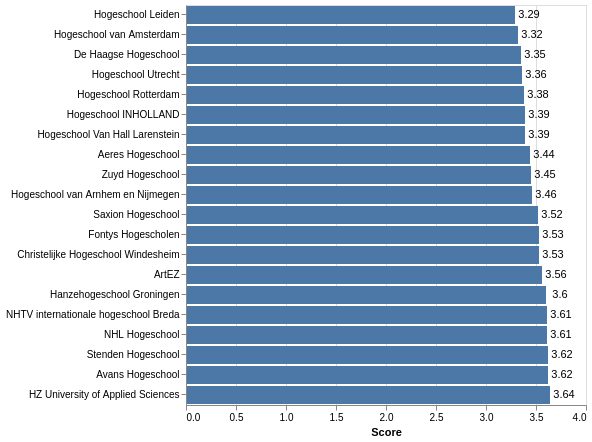

In [12]:
bars = alt.Chart(ranglijst).mark_bar().encode(
    y=alt.Y('BrinNaamActueel', title=None, sort=alt.EncodingSortField(field='Score'))
    , x='Score'
)

text = alt.Chart(ranglijst).mark_text(dx=14).encode(
    y=alt.Y('BrinNaamActueel', title=None, sort=alt.EncodingSortField(field='Score'))
    , x='Score'
    , text='Score'
)

bars + text

In [26]:
cols = haalbaarheid + ['Haalbaarheid']

scores_per_instelling = hbo_vt_2018.groupby(['BrinNaamActueel','BrinActueel']).mean()[cols].reset_index()

In [27]:
long = pd.melt(scores_per_instelling
        , id_vars=['BrinNaamActueel','BrinActueel']
         , var_name='Variabele'
         , value_name='Score')

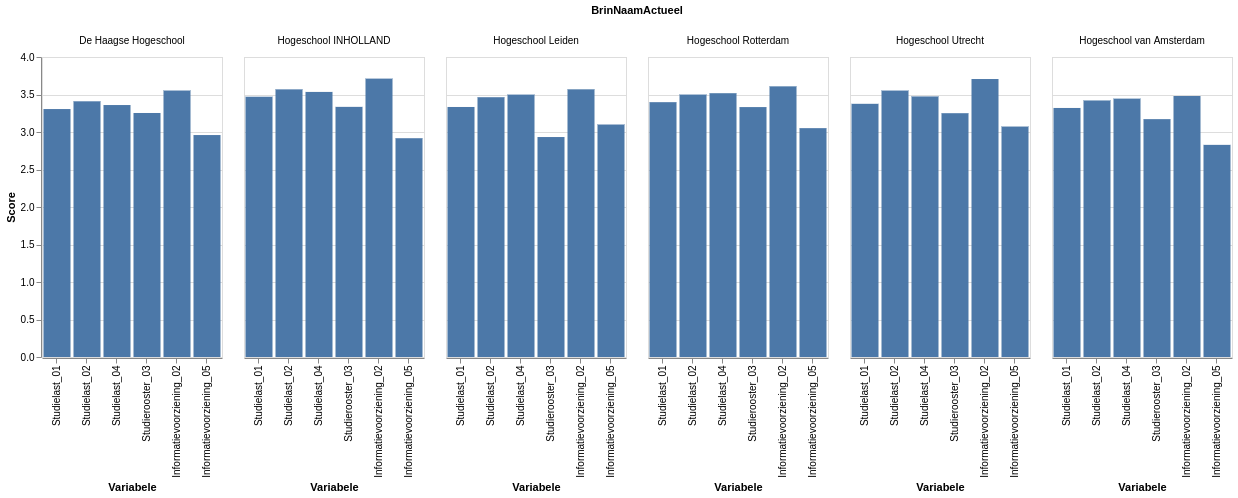

In [37]:
filter_g5 = long.BrinActueel.isin(g5_brin)
filter_haalbaarheid=long.Variabele!='Haalbaarheid'
alt.Chart(long[(filter_g5) & (filter_haalbaarheid)],width=180).mark_bar().encode(
      y='Score'
    , x=alt.X('Variabele', sort=alt.EncodingSortField(field='Variabele'))).facet(column='BrinNaamActueel')


## Controle

We kijken op een aantal manieren of de manier waarop Keuzegids de schaal maakt hout snijdt. Hieronder een correlatiematrix van alle items.

### Correlatiematrix

In [38]:
hbo_vt_2018[haalbaarheid].corr()

,Studielast_01,Studielast_02,Studielast_04,Studierooster_03,Informatievoorziening_02,Informatievoorziening_05
Studielast_01,1.000000,0.600117,0.489243,0.440977,0.352071,0.359667
Studielast_02,0.600117,1.000000,0.553853,0.396082,0.354850,0.362744
Studielast_04,0.489243,0.553853,1.000000,0.359075,0.412505,0.357018
Studierooster_03,0.440977,0.396082,0.359075,1.000000,0.315867,0.383626
Informatievoorziening_02,0.352071,0.354850,0.412505,0.315867,1.000000,0.383569
Informatievoorziening_05,0.359667,0.362744,0.357018,0.383626,0.383569,1.000000


## Cronbach's alpha
Keuzegids maakt een eigen schaal. Maar is het ook een schaal? Cronbach's alpha kan ons helpen een indicatie krijgen van de betrouwbaarheid van de schaal/

In [39]:
import numpy
def cronbach(itemscores):
    itemscores = numpy.asarray(itemscores)
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [40]:
def get_itemscores(data, items):
    """Maakt een lijst van lijsten. Iedere lijst zijn de scores op een item, missings
    worden opgevuld met het gemiddelde."""
    itemscores = []
    data = data[items].dropna()
    for item in items:
        itemscores_filled = data[item].fillna(data[item].mean()).tolist()
        itemscores.append(itemscores_filled)
    return itemscores
    
itemscores = get_itemscores(hbo_vt_2018, haalbaarheid)

In [41]:
cronbach(itemscores)

0.8038503333689151

Met een cronbach's alpha van 0,81 kan je zeggen dat de schaal betrouwbaarheid is. De items hangen dus wel voldoende met elkaar samen.

### Maar zijn het reeele verschillen?

group1,group2,meandiff,p-adj,lower,upper,reject
Aeres Hogeschool,ArtEZ,0.0891,0.1708,-0.0119,0.1901,False
Aeres Hogeschool,Avans Hogeschool,0.1634,0.001,0.0895,0.2372,True
Aeres Hogeschool,Christelijke Hogeschool Windesheim,0.125,0.001,0.0483,0.2018,True
Aeres Hogeschool,De Haagse Hogeschool,-0.1313,0.001,-0.207,-0.0556,True
Aeres Hogeschool,Fontys Hogescholen,0.0452,0.7672,-0.0276,0.1181,False
Aeres Hogeschool,HZ University of Applied Sciences,0.2223,0.001,0.1334,0.3111,True
Aeres Hogeschool,Hanzehogeschool Groningen,0.0874,0.005,0.0131,0.1617,True
Aeres Hogeschool,Hogeschool INHOLLAND,-0.0159,0.9,-0.092,0.0601,False
Aeres Hogeschool,Hogeschool Leiden,-0.121,0.001,-0.203,-0.0391,True
Aeres Hogeschool,Hogeschool Rotterdam,-0.0359,0.9,-0.1097,0.038,False


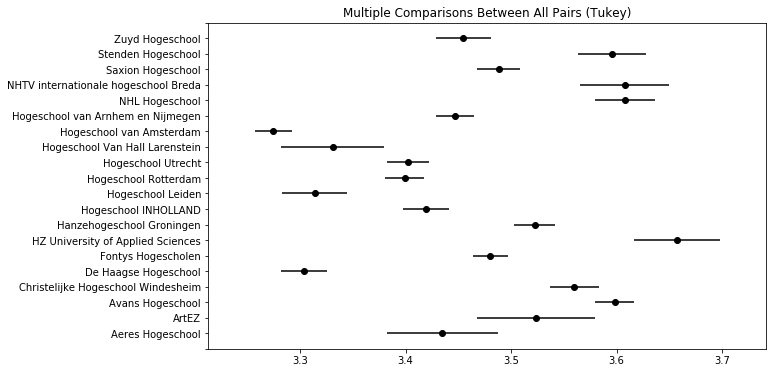

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats as stats

tukey = pairwise_tukeyhsd(endog=hbo_vt_2018.dropna(subset=['Haalbaarheid']).Haalbaarheid,     # Data
                          groups=hbo_vt_2018.dropna(subset=['Haalbaarheid'])['BrinNaamActueel'],   # Groups
                          alpha=0.05)          # Significance level

tk = tukey.plot_simultaneous()    # Plot group confidence intervals

tukey.summary()